# Multiple Linear Regression
## Bike Sharing

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')#Filter Warning Messages

# Import the numpy and pandas package

import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)## Set display limit for the rows
pd.set_option('display.max_columns', None)## Set display limit for the columns 
pd.set_option('display.max_info_columns',120)# set display limit for Info columns
pd.set_option('display.width', None)



In [2]:
# Read the given CSV file, and view some sample records

bike_share = pd.read_csv("day.csv",low_memory=False)
bike_share.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Let's inspect the various aspects of our dataframe

In [3]:
print("Shape of bike_share : ",bike_share.shape)
print("\n\nInfo of bike_share :\n")
bike_share.info()
print("\n\n Describe bike_share :")
bike_share.describe()

Shape of bike_share :  (730, 16)


Info of bike_share :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 Describe bike_share :


instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Data Handling and Cleaning / Data Quality Checks

Here we will do following:

- Fix rows and columns
- Fix missing values
- Standardise values
- Fix invalid values
- Filter data

### 2.1 Checking duplicate rows


In [4]:
print("Duplicate rows : ",bike_share.duplicated().sum())#0 duplicate rows

Duplicate rows :  0


### 2.2 Checking Missing values in columns

In [5]:
bike_share.isna().sum()#0 such columns found

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2.3 Checking rows with all Missing or Null Values

In [6]:
bike_share.isnull().sum(axis=1)#0 such rows found

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

### 2.4 Removing Columns that would not have any influence over the Analysis of given problem statement

- 1. instant : As it represents record index which doesn't have significance here
- 2. dteday  : It represents date and we already have month and year columns(yr,mnth), hence we can remove this date as its redundant information for our analysis
- 3. casual & registered : count of casual users & count of registered users aren;t significant here as our target is 'cnt' variable which indicates the total number of bike rentals, including both casual and registered

All above 4 variables we are removing from total 16 columns.

In [7]:
bike_new = bike_share.drop(['instant','dteday','casual','registered'],axis=1)
bike_new.shape

(730, 12)

In [8]:
# 'temp','atemp','hum','windspeed' columns
## Rounding the values of 'temp','atemp','hum','windspeed' columns to 3 decimal places
bike_new[['temp','atemp','hum','windspeed']] = bike_share[['temp','atemp','hum','windspeed']].round(3)

In [9]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
bike_new

season  yr  mnth  holiday  weekday  workingday  weathersit    temp  \
0         1   0     1        0        6           0           2  14.111   
1         1   0     1        0        0           0           2  14.903   
2         1   0     1        0        1           1           1   8.051   
3         1   0     1        0        2           1           1   8.200   
4         1   0     1        0        3           1           1   9.305   
..      ...  ..   ...      ...      ...         ...         ...     ...   
725       1   1    12        0        4           1           2  10.421   
726       1   1    12        0        5           1           2  10.387   
727       1   1    12        0        6           0           2  10.387   
728       1   1    12        0        0           0           1  10.489   
729       1   1    12        0        1           1           2   8.849   

      atemp     hum  windspeed   cnt  
0    18.181  80.583     10.750   985  
1    17.687  69.609     16.652   801  
2     9.470  43.727     16.637  1349  
3    10.606  59.044     10.740  1562  
4    11.464  43.696     12.522  1600  
..      ...     ...        ...   ...  
725  11.332  65.292     23.459  2114  
726  12.752  59.000     10.417  3095  
727  12.120  75.292      8.334  1341  
728  11.585  48.333     23.501  1796  
729  11.174  57.750     10.375  2729  

[730 rows x 12 columns]

## Step 3: Exploratory Data analysis / Derived Columns

Lets take Insights from the data that will help us also for visualisation:

    - Types of variables : Categorical variables, Quantitative / numeric variables

This will help us for further steps of visualisation & Dummy variables creation

#### 3.1 Here are following Types of variables in bike sharing data

- 1. Categorical variables list : ['season','yr','mnth','holiday','weekday','workingday','weathersit']
- 2. Numeric variables list : ['temp','atemp','hum','windspeed','cnt']

Although we have categorical variables but their Dtype(Data type) is integer only , hence we will convert them so that they can be easily identified as categorical

In [11]:
## Converting 'season' column to categorical
## From Data Dictionary : season (1:spring, 2:summer, 3:fall, 4:winter)
bike_new.season = bike_share.season.astype('str').map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})

In [12]:
## Converting 'mnth' column to categorical
## From Data Dictionary : month ( 1 to 12)
bike_new.mnth = bike_share.mnth.astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})

In [13]:
## Converting 'weekday' column to categorical
## From Data Dictionary : day of the week
bike_new.weekday = bike_share.weekday.astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})

In [14]:
## Converting 'weathersit' column to categorical
## From Data Dictionary : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered 
bike_new.weathersit = bike_share.weathersit.astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})

In [15]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [16]:
bike_new

season  yr mnth  holiday weekday  workingday weathersit    temp   atemp  \
0    spring   0  Jan        0     Sat           0     Cloudy  14.111  18.181   
1    spring   0  Jan        0     Sun           0     Cloudy  14.903  17.687   
2    spring   0  Jan        0     Mon           1      Clear   8.051   9.470   
3    spring   0  Jan        0     Tue           1      Clear   8.200  10.606   
4    spring   0  Jan        0     Wed           1      Clear   9.305  11.464   
..      ...  ..  ...      ...     ...         ...        ...     ...     ...   
725  spring   1  Dec        0     Thu           1     Cloudy  10.421  11.332   
726  spring   1  Dec        0     Fri           1     Cloudy  10.387  12.752   
727  spring   1  Dec        0     Sat           0     Cloudy  10.387  12.120   
728  spring   1  Dec        0     Sun           0      Clear  10.489  11.585   
729  spring   1  Dec        0     Mon           1     Cloudy   8.849  11.174   

        hum  windspeed   cnt  
0    80.583     10.750   985  
1    69.609     16.652   801  
2    43.727     16.637  1349  
3    59.044     10.740  1562  
4    43.696     12.522  1600  
..      ...        ...   ...  
725  65.292     23.459  2114  
726  59.000     10.417  3095  
727  75.292      8.334  1341  
728  48.333     23.501  1796  
729  57.750     10.375  2729  

[730 rows x 12 columns]

### 3.2 Derived columns
Its usual observation looking at problem statement that weekend variable should be significant but we don't have it in data.
Hence Lets create weekend derived column from weekday

In [17]:
## Deriving 'weekend' column
bike_new['weekend'] = bike_new.weekday.map({'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':1, 'Sun':1})

In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  weekend     730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [19]:
## Creating categorical variables list and numeric variables list for data visualisation
## because we have more variables and visualisation can become difficult to draw insights

cat_list=['season','yr','mnth','holiday','weekday','weekend','workingday','weathersit']
num_list=['temp','atemp','hum','windspeed','cnt']

print("Categorical variables list : ",cat_list)
print("Numerical variables list : ",num_list)

Categorical variables list :  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weekend', 'workingday', 'weathersit']
Numerical variables list :  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


## Step 4: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

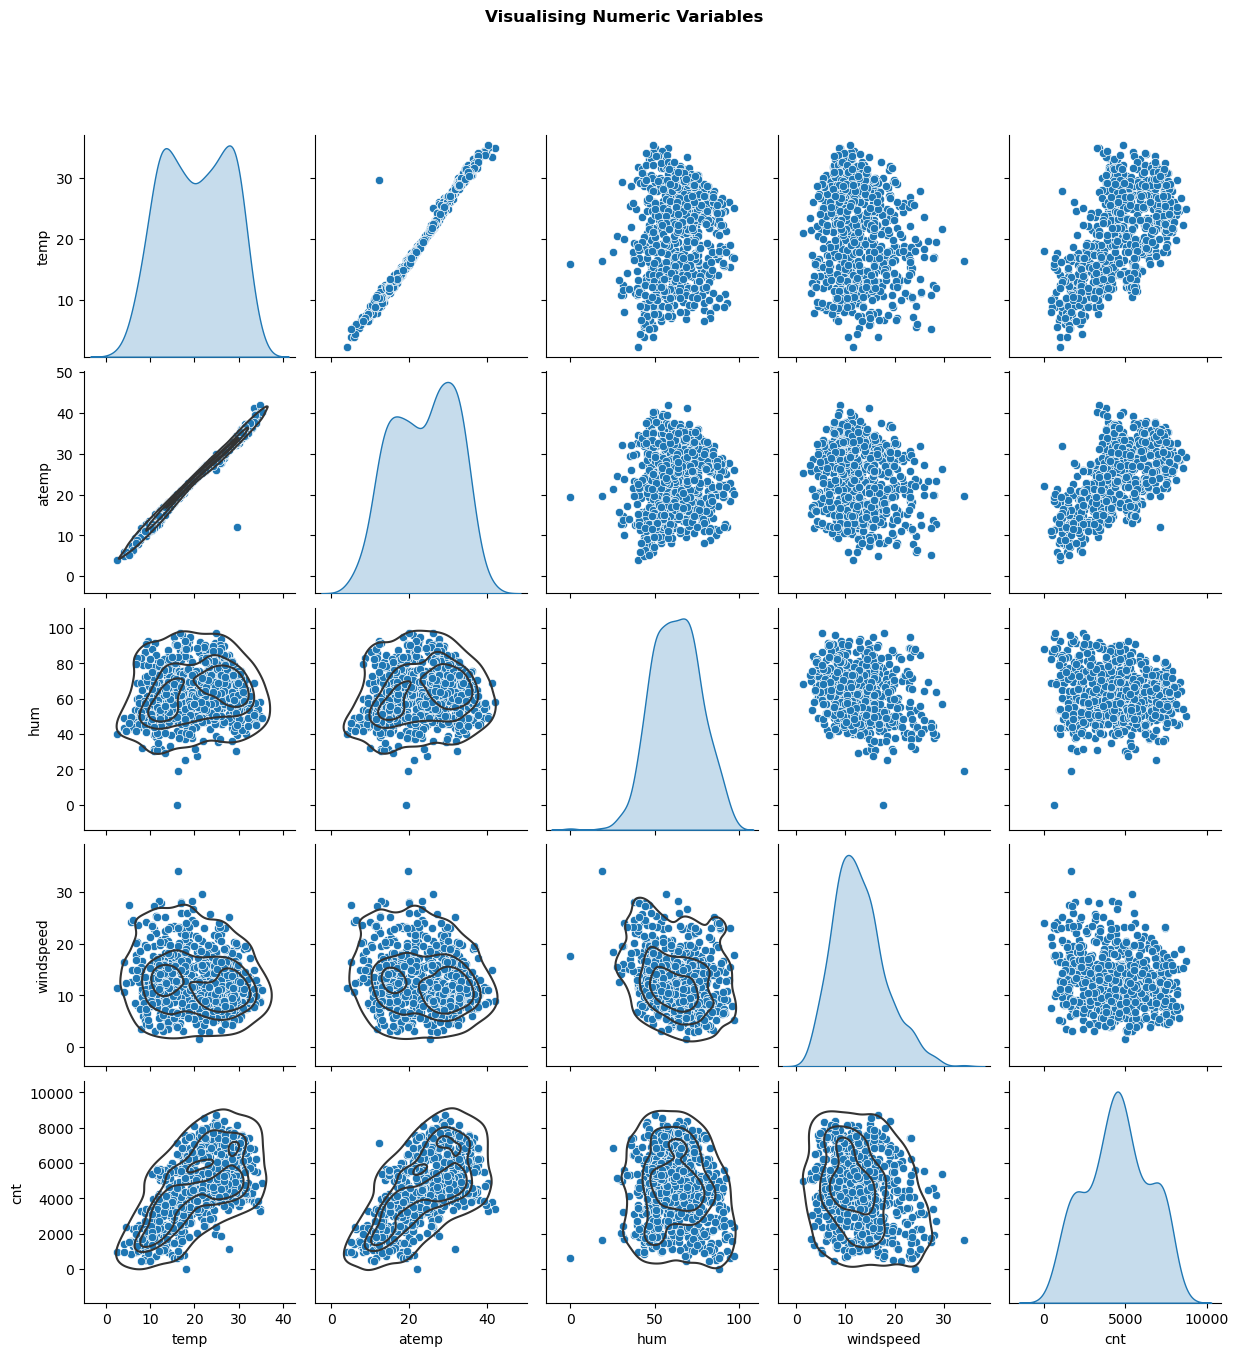

In [20]:

g = sns.pairplot(data=bike_new,palette="Set3",x_vars=num_list,y_vars=num_list,diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.fig.suptitle("Visualising Numeric Variables\n", y=1.085,weight='extra bold')
plt.show()

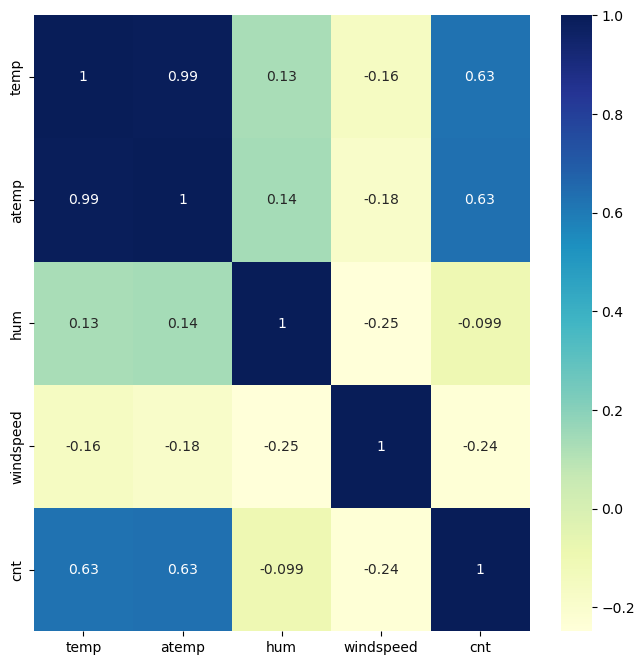

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(bike_new[num_list].corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

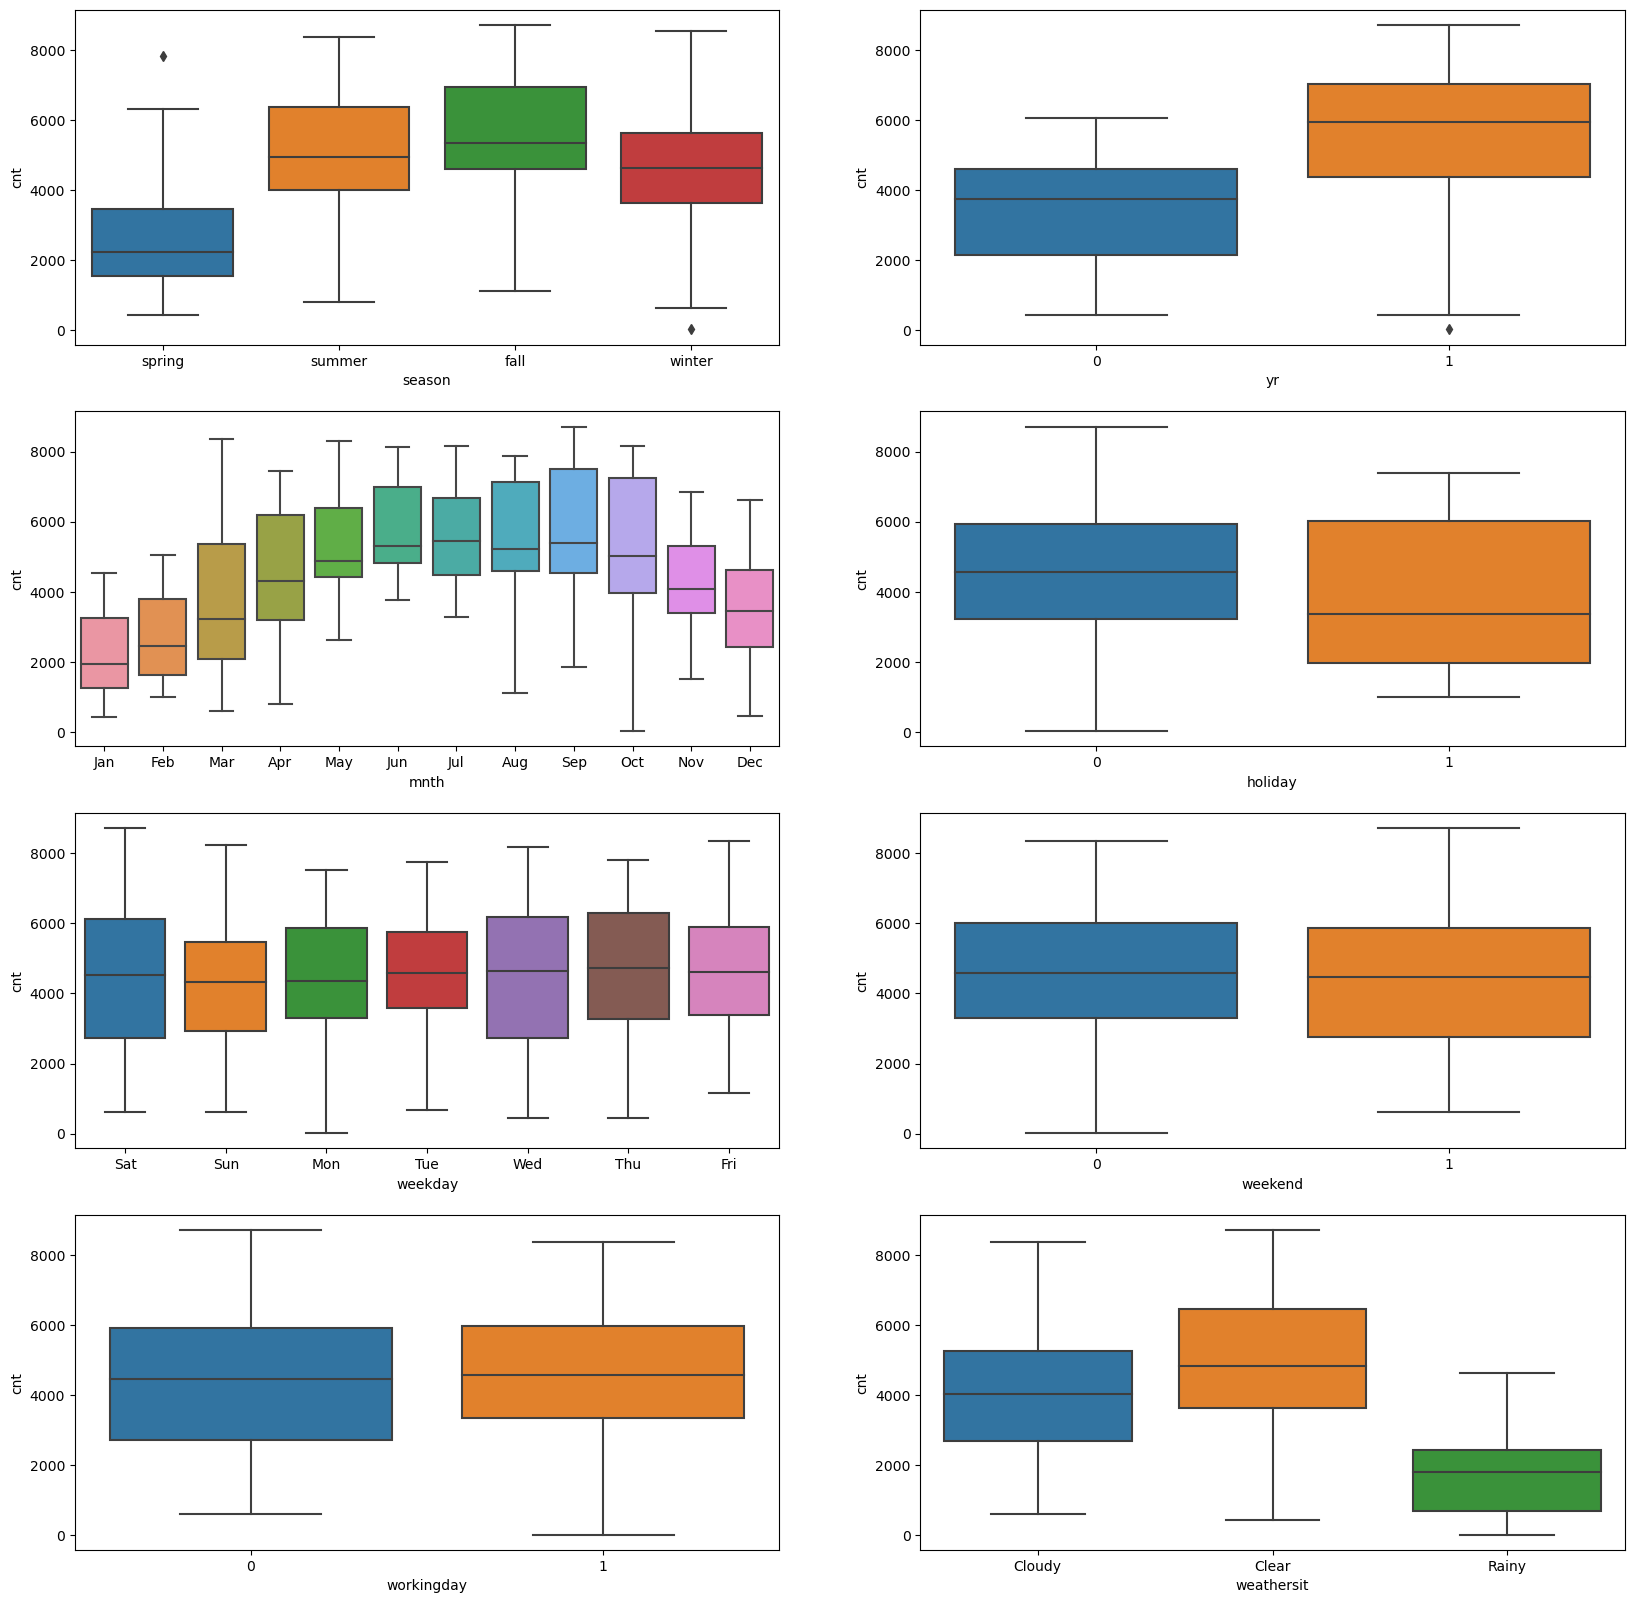

In [22]:
# Function to create boxplot
# Function Parameters   -
#def plot_box(x,y,data)
#'season','yr','mnth','holiday','weekday','weekend','workingday','weathersit'
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekend', y = 'cnt', data = bike_new)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(4,2,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.show()

#### We can also visualise some of these categorical features parallely by using the `hue` argument. 
Below is the plot for `season` with `yr` as the hue.

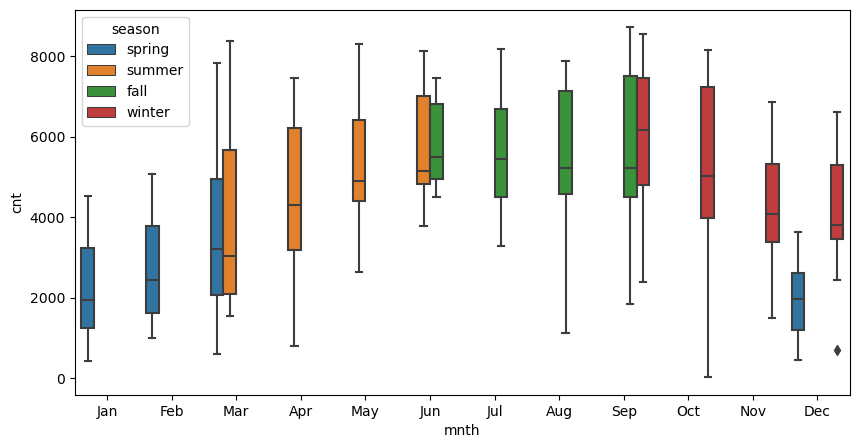

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'season', data = bike_new)
plt.show()

In [24]:
# Potential Outlier : In december month how spring is shown , lets check further if its constant across
# all years 

fig = px.treemap(
    bike_new, path=['mnth', 'season','yr'], values='cnt', color='season', color_continuous_midpoint=50, color_continuous_scale=px.colors.diverging.Portland
)
fig.show()

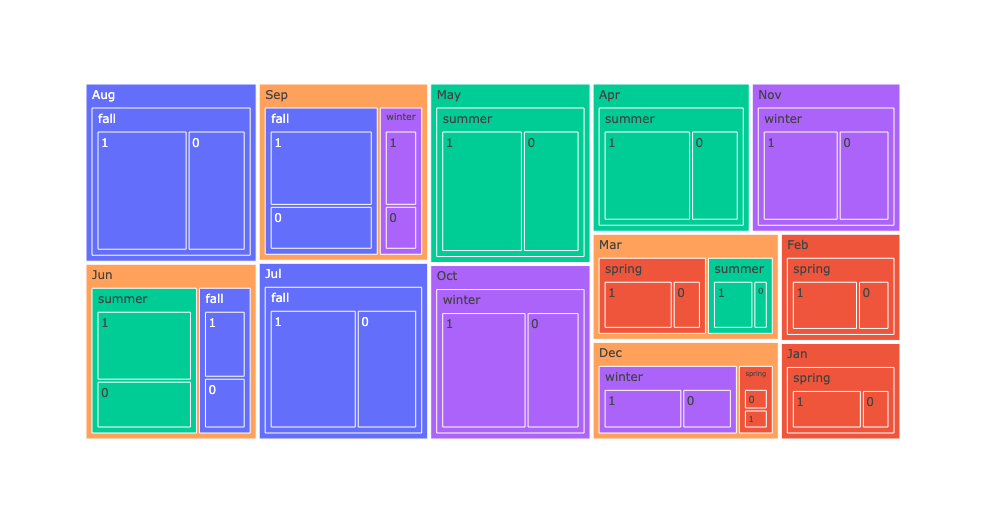

In [25]:
## Further insights for weathersit variable
plt.figure(figsize = (30, 30))
fig = px.treemap(
    bike_new, path=['weathersit','mnth', 'season'], values='cnt', color='mnth', color_continuous_midpoint=np.average(bike_new['cnt']), color_continuous_scale=px.colors.diverging.Portland
)
fig.show()

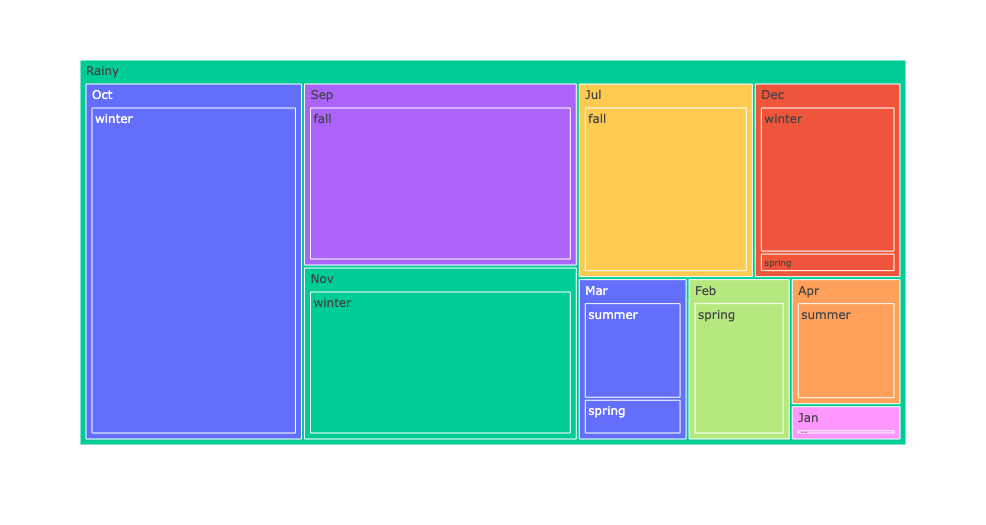

### 4.Visualisation.Insights 

#### Numeric variables visualisation : 
- 1. temp,atemp and cnt are showing linearly relation, hemce we can go ahead with considering linear regression model here.
- 2. Through heat map also temp,atemp and cnt are significanly correlated
- 3. As is visible from the pairplot and the heatmap, the variable `temp` seems to be most correlated with `atemp`.
     This seems case of multicollinearity We can remove them further based on VIF 
    
#### Categorical variables visualisation : 
**1.`season`** : 

- A. Highest number of bike rentals is for season : "fall" 
- B. "winter" and "summer" also has median around "fall" only

There is significant variation observed , this can be a good feature.

**2. `yr`**: 
- Booking in 2019 is greater than 2018, this indicates good progress over years.This can be a good feature. 

**3. `mnth`**: 
- A. We observed that season "spring" is coming in month "Dec" which was quite unusual and has potential of an outlier

- B. Hence we checked with year and found this is constant over years as for certain dates after "winter" this data considers "spring" 

Good variation can be seen , This can be a good feature
    
**4.`holiday`** : 
- A. bike data has considered weekend as non-holiday only. For non-weekends only holiday is considered.
- B. On non-holiday bookings are happening significantly more than holidays
This variables seems biased data and is not significant feature.
    
**5. `weekday`**    : Its showing small variation , it's not significant feature

**6. `weekend`**    : Its showing small variation , it's not significant feature

**7. `workingday`** : Its showing small variation , it's not significant feature

**8. `weathersit`** : 
- A. Its showing in 'Rainy' season there is significant drop through boxplot

- B. We checked that 'Rainy' weathersit is falling most in months - 'Jul','Sep','Oct','Nov'

- C. "fall" season seemed highest number of bike rents but "summer" season seems to have least "Rainy" weather

This can be good feature for our model.   
    

## 5. Creating Dummy variables for categorical variables

In [26]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   weekend            730 non-null    int64  
 9   season_spring      730 non-null    uint8  
 10  season_summer      730 non-null    uint8  
 11  season_winter      730 non-null    uint8  
 12  mnth_Aug           730 non-null    uint8  
 13  mnth_Dec           730 non-null    uint8  
 14  mnth_Feb           730 non-null    uint8  
 15  mnth_Jan           730 non-null    uint8  
 16  mnth_Jul           730 non

#### 5.Insights

Here for following categorical variables dummy variables have been created:

**`season`** : Now, we don't need four values. We can drop the `fall` value of column, as the season can be identified with just the 3 columns where — 
- `000` will correspond to `fall`

**`mnth`** : Now, we don't need 12 values. We can drop the `Apr` value of column, as the season can be identified with just the 11 columns where — 
- `00000000000` will correspond to `Apr`

**`weekday`** : Now, we don't need 7 values. We can drop the `Fri` value of column, as the season can be identified with just the 6 columns where — 
- `000000` will correspond to `Fri`


In [27]:
bike_new

yr  holiday  workingday    temp   atemp     hum  windspeed   cnt  \
0     0        0           0  14.111  18.181  80.583     10.750   985   
1     0        0           0  14.903  17.687  69.609     16.652   801   
2     0        0           1   8.051   9.470  43.727     16.637  1349   
3     0        0           1   8.200  10.606  59.044     10.740  1562   
4     0        0           1   9.305  11.464  43.696     12.522  1600   
..   ..      ...         ...     ...     ...     ...        ...   ...   
725   1        0           1  10.421  11.332  65.292     23.459  2114   
726   1        0           1  10.387  12.752  59.000     10.417  3095   
727   1        0           0  10.387  12.120  75.292      8.334  1341   
728   1        0           0  10.489  11.585  48.333     23.501  1796   
729   1        0           1   8.849  11.174  57.750     10.375  2729   

     weekend  season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
0          1              1              0              0         0         0   
1          1              1              0              0         0         0   
2          0              1              0              0         0         0   
3          0              1              0              0         0         0   
4          0              1              0              0         0         0   
..       ...            ...            ...            ...       ...       ...   
725        0              1              0              0         0         1   
726        0              1              0              0         0         1   
727        1              1              0              0         0         1   
728        1              1              0              0         0         1   
729        0              1              0              0         0         1   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
0           0         1         0         0         0         0         0   
1           0         1         0         0         0         0         0   
2           0         1         0         0         0         0         0   
3           0         1         0         0         0         0         0   
4           0         1         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         0         0         0         0         0         0         0   
726         0         0         0         0         0         0         0   
727         0         0         0         0         0         0         0   
728         0         0         0         0         0         0         0   
729         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0           0         0            0            1            0            0   
1           0         0            0            0            1            0   
2           0         0            1            0            0            0   
3           0         0            0            0            0            0   
4           0         0            0            0            0            0   
..        ...       ...          ...          ...          ...          ...   
725         0         0            0            0            0            1   
726         0         0            0            0            0            0   
727         0         0            0            1            0            0   
728         0         0            0            0            1            0   
729         0         0            1            0            0            0   

     weekday_Tue  weekday_Wed  weathersit_Cloudy  weathersit_Rainy  
0              0            0                  1                 0  
1              0            0                  1                 0  
2              0            0                  0                 0  
3    

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
Here we can see that all the numeric columns have varying float values. 
So it is extremely important to rescale the variables so that they have a comparable scale. 
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 
This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509908  0.501129  0.575349   0.300809   
576   1        0           1  0.815190  0.766355  0.725634   0.264679   
426   1        0           0  0.442408  0.438990  0.640187   0.255342   
728   1        0           0  0.245107  0.200357  0.498063   0.663126   
482   1        0           0  0.395666  0.391736  0.504503   0.188475   

          cnt  weekend  season_spring  season_summer  season_winter  mnth_Aug  \
653  0.864243        0              0              0              1         0   
576  0.827658        0              0              0              0         0   
426  0.465255        1              1              0              0         0   
728  0.204096        1              1              0              0         0   
482  0.482973        1              0              1              0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
653         0         0         0         0         0         0         0   
576         0         0         0         1         0         0         0   
426         0         0         0         0         0         1         0   
728         1         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_Nov  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  \
653         0         1         0            0            0            0   
576         0         0         0            0            0            0   
426         0         0         0            0            1            0   
728         0         0         0            0            0            1   
482         0         0         0            0            1            0   

     weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Cloudy  \
653            0            1            0                  0   
576            0            1            0                  0   
426            0            0            0                  1   
728            0            0            0                  0   
482            0            0            0                  1   

     weathersit_Rainy  
653                 0  
576                 0  
426                 0  
728                 0  
482                 0

In [31]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537273    0.512993    0.650367   
std      0.500429    0.157763    0.468282    0.225843    0.212381    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339860    0.332097    0.538640   
50%      1.000000    0.000000    1.000000    0.540527    0.526817    0.653712   
75%      1.000000    0.000000    1.000000    0.735230    0.688465    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt     weekend  season_spring  season_summer  \
count  510.000000  510.000000  510.000000     510.000000     510.000000   
mean     0.320776    0.513620    0.298039       0.243137       0.245098   
std      0.169795    0.224593    0.457846       0.429398       0.430568   
min      0.000000    0.000000    0.000000       0.000000       0.000000   
25%      0.199191    0.356420    0.000000       0.000000       0.000000   
50%      0.296782    0.518638    0.000000       0.000000       0.000000   
75%      0.414450    0.684710    1.000000       0.000000       0.000000   
max      1.000000    1.000000    1.000000       1.000000       1.000000   

       season_winter    mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan  \
count      510.00000  510.000000  510.000000  510.000000  510.000000   
mean         0.24902    0.096078    0.084314    0.066667    0.088235   
std          0.43287    0.294988    0.278131    0.249689    0.283915   
min          0.00000    0.000000    0.000000    0.000000    0.000000   
25%          0.00000    0.000000    0.000000    0.000000    0.000000   
50%          0.00000    0.000000    0.000000    0.000000    0.000000   
75%          0.00000    0.000000    0.000000    0.000000    0.000000   
max          1.00000    1.000000    1.000000    1.000000    1.000000   

         mnth_Jul    mnth_Jun    mnth_Mar    mnth_May    mnth_Nov    mnth_Oct  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.074510    0.098039    0.084314    0.086275    0.086275   
std      0.266010    0.262857    0.297660    0.278131    0.281045    0.281045   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count  510.000000   510.000000   510.000000   510.000000   510.000000   
mean     0.080392     0.150980     0.154902     0.143137     0.133333   
std      0.272166     0.358381     0.362166     0.350557     0.340268   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  weathersit_Cloudy  weathersit_Rainy  
count   510.000000   510.000000         510.000000        510.000000  
mean      0.131373     0.158824           0.343137          0.029412  
std       0.338139     0.365870           0.475223          0.169124  
min       0.000000     0.000000           0.000000          0.000000  
25%       0.000000     0.000000           0.000000          0.000000  
50%       0.000000     0.000000           0.000000          0.000000  
75%       0.000000     0.000000           1.000000          0.000000  
max 

<Figure size 3000x3000 with 0 Axes>

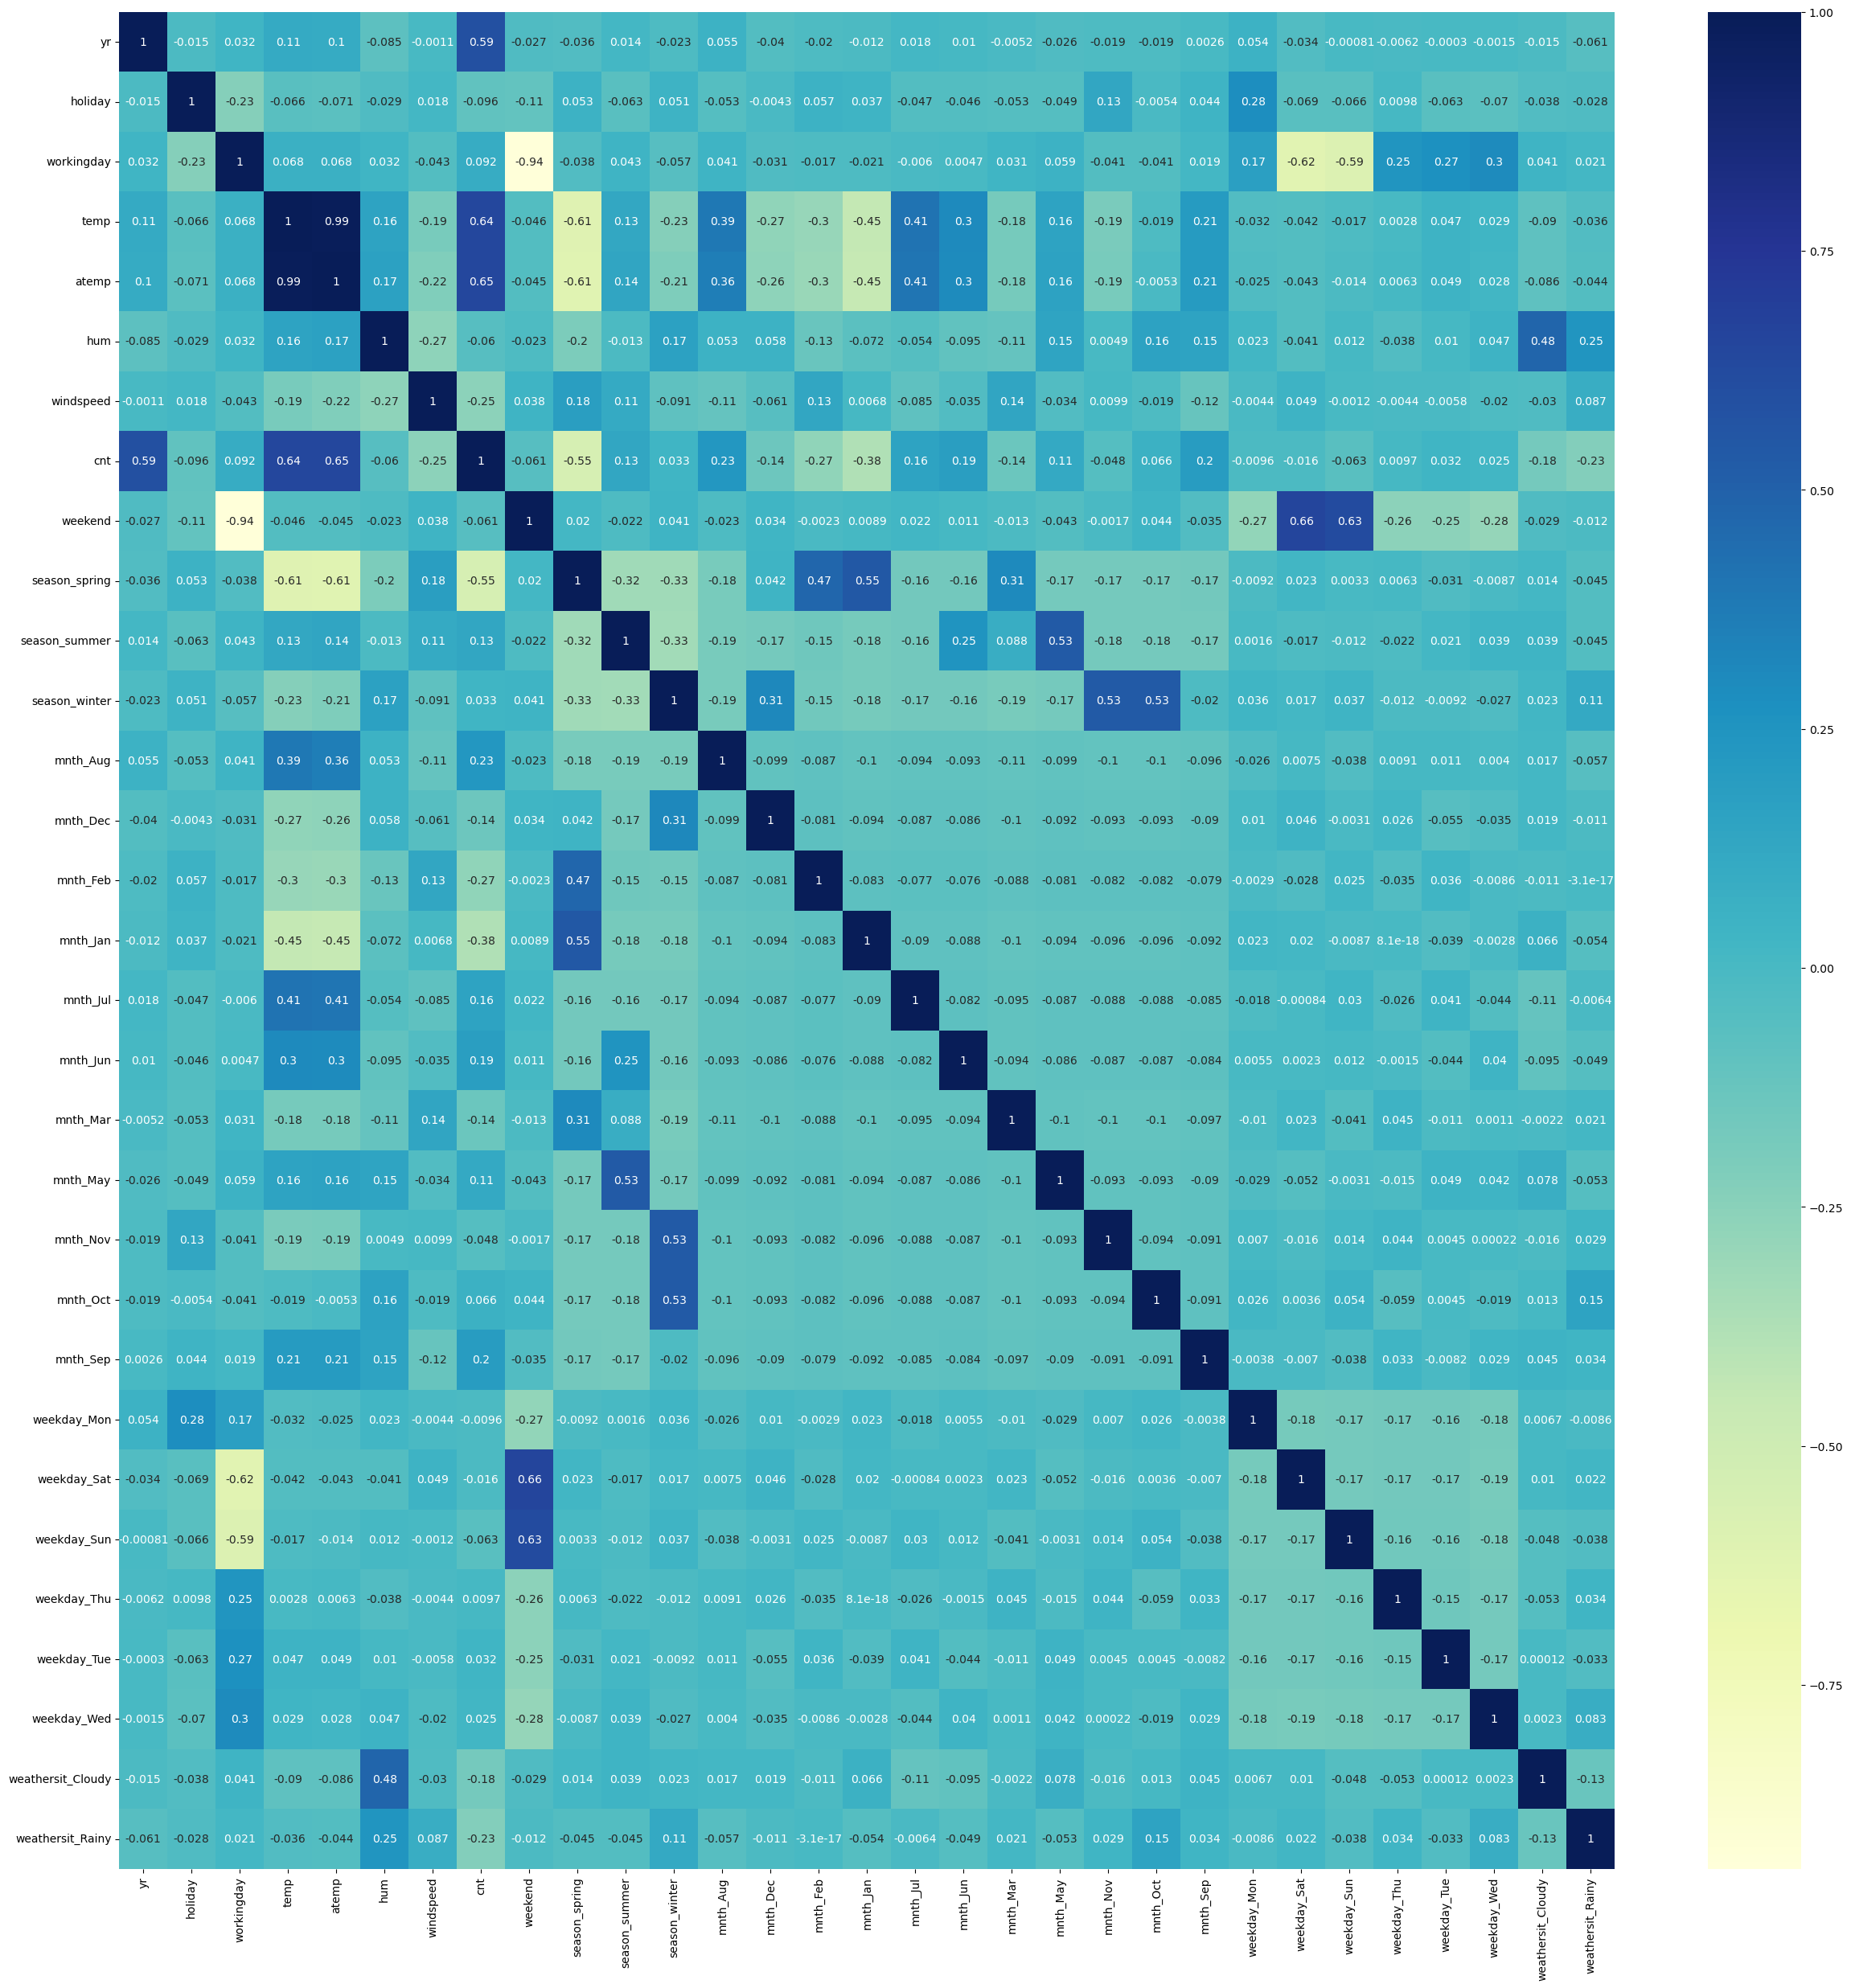

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we have noticed:
- `temp`,`atemp`,`yr` seems to the correlated to `cnt` the most
- `hum` seems correlated to `weathersit_Cloudy`
- Multicolinearity exists b/w variables : ex : `temp` & `atemp`


### Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.shape

(510, 30)

In [35]:
y_train.shape

(510,)

## Step 5: Building a linear model

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step=12)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 3),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 3),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 3),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Rainy', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'weekend',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Cloudy', 'weathersit_Rainy'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.82e-190
Time:                        19:47:14   Log-Likelihood:                 511.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2134      0.02

`holiday` is insignificant in presence of other variables; can be dropped

In [40]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.82e-190
Time:                        19:47:14   Log-Likelihood:                 511.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2331      0.04

`weekday_Sun` is insignificant in presence of other variables; can be dropped

In [41]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'weekend',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Cloudy', 'weathersit_Rainy'],
      dtype='object')

In [42]:
X_train_new = X_train_new.drop(['weekday_Sun'], axis=1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.82e-190
Time:                        19:47:14   Log-Likelihood:                 511.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2331      0.04

`weekend` is insignificant in presence of other variables as per our data understanding till this point post watching removal of weekend_Sun; it can also be dropped

In [43]:
X_train_new = X_train_lm.drop(['weekend'], axis=1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.88e-190
Time:                        19:47:14   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2842      0.03

In [44]:
X_train_new = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                 hum  23.18
2                temp  15.91
1          workingday   4.63
4           windspeed   4.12
5       season_spring   2.59
10  weathersit_Cloudy   2.23
6       season_winter   2.09
0                  yr   2.06
9         weekday_Sat   1.82
7            mnth_Jul   1.40
8            mnth_Sep   1.20
11   weathersit_Rainy   1.20

`hum` seems insignificant and high VIF ; can be dropped

In [45]:
X_train_final = X_train_new.drop(['hum'], axis=1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_final)
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.53e-188
Time:                        19:47:14   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2038      0.02

In [46]:
X_train_final = X_train_lm.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                temp  6.54
1          workingday  4.47
3           windspeed  4.11
0                  yr  2.06
4       season_spring  1.81
8         weekday_Sat  1.79
9   weathersit_Cloudy  1.54
5       season_winter  1.45
6            mnth_Jul  1.36
7            mnth_Sep  1.20
10   weathersit_Rainy  1.08

In [47]:
X_train_final.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Cloudy', 'weathersit_Rainy'],
      dtype='object')

In [48]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 510 non-null    int64  
 1   workingday         510 non-null    int64  
 2   temp               510 non-null    float64
 3   windspeed          510 non-null    float64
 4   season_spring      510 non-null    uint8  
 5   season_winter      510 non-null    uint8  
 6   mnth_Jul           510 non-null    uint8  
 7   mnth_Sep           510 non-null    uint8  
 8   weekday_Sat        510 non-null    uint8  
 9   weathersit_Cloudy  510 non-null    uint8  
 10  weathersit_Rainy   510 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 23.4 KB


## Linear Regression Assumptions cecks
- Linear relationship
- No or little Multicollinearity
- Homoscedasticity
- Residual autocorrelation
- Normality of the residuals


## Checking Linear relationship

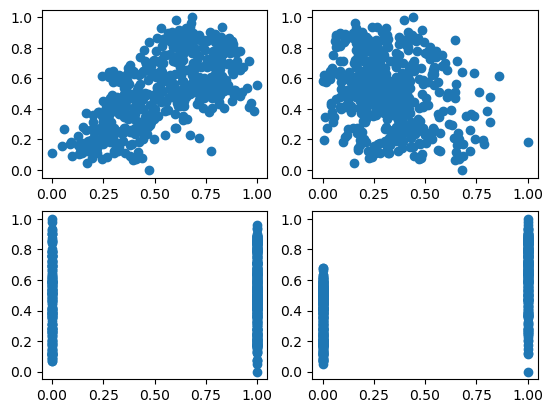

In [49]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['temp'], y_train)
ax2.scatter(X['windspeed'], y_train)
ax3.scatter(X['workingday'], y_train)
ax4.scatter(X['yr'], y_train)
plt.show()

#### Linear relationshp exist : There isn’t any clear non-linear pattern and a linear model may work well on this.

## Checking multicolinearity once again

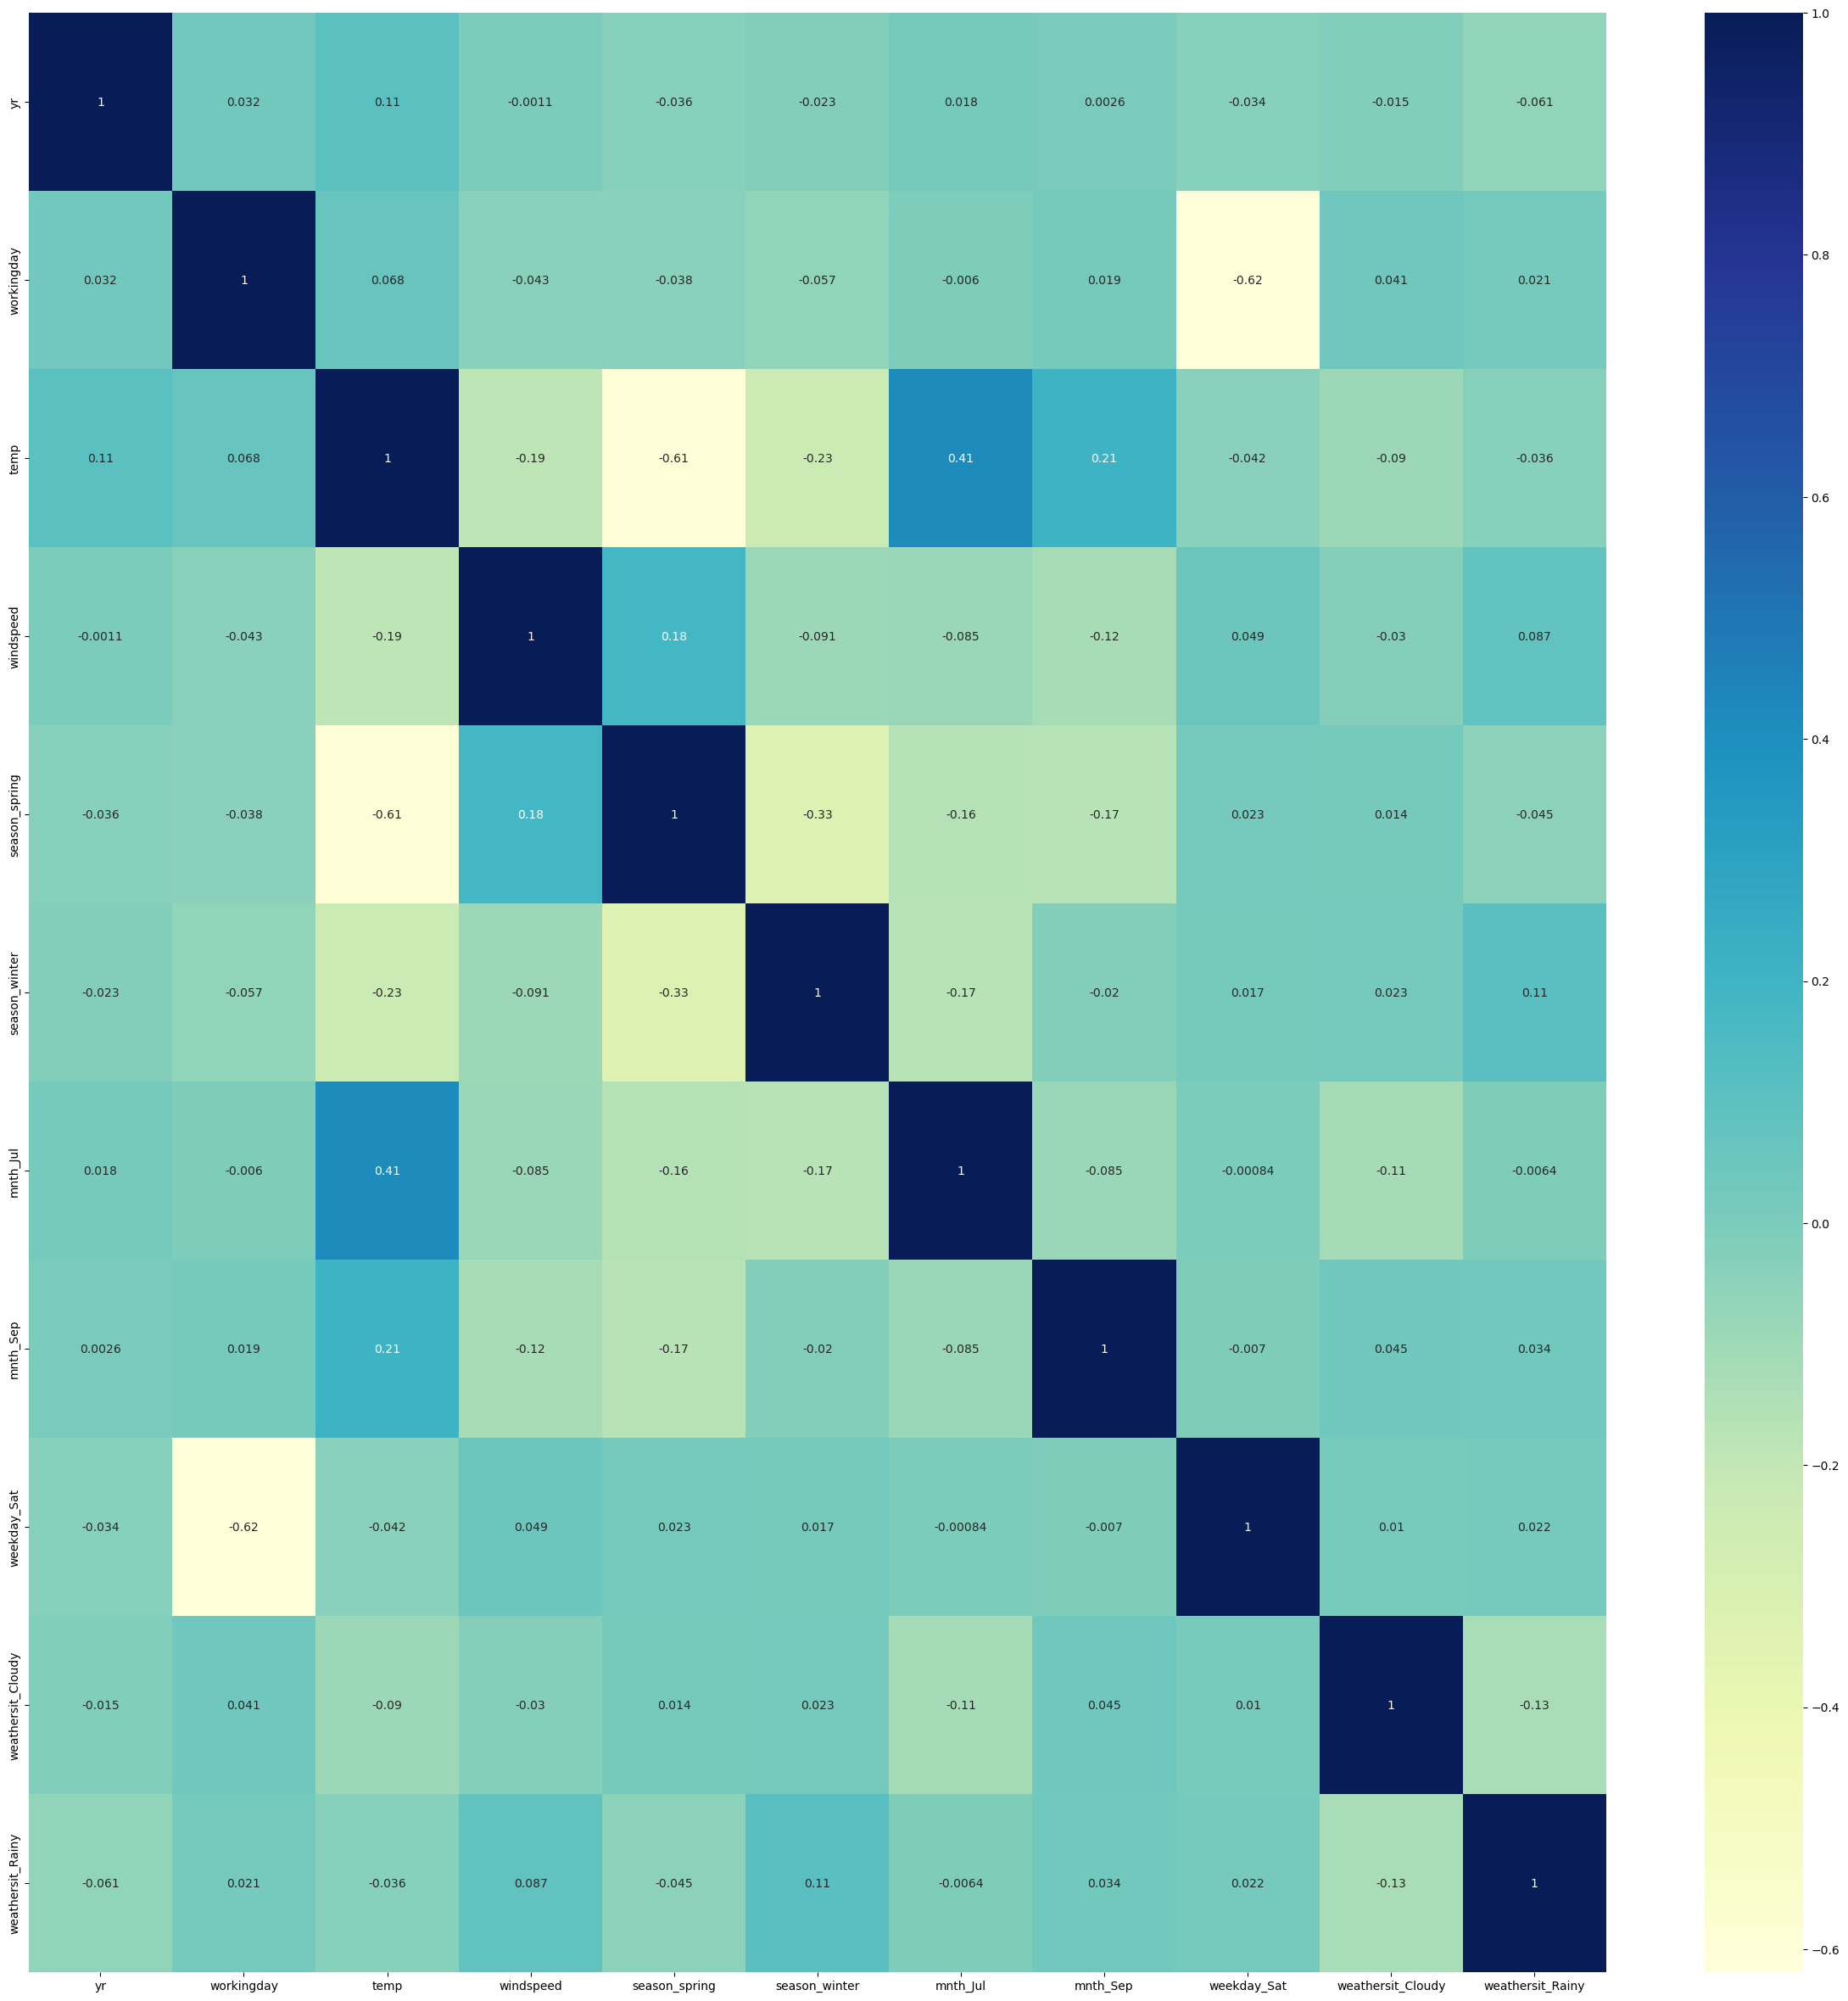

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(X_train_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### No high corelation exist among our selected feature variables
#### Also low VIF we found in our final model : lm4

Hence we can say there is no multicolinearity here

## Checking Homoscedasticity 
#### It means that the error is constant along the values of the dependent variable

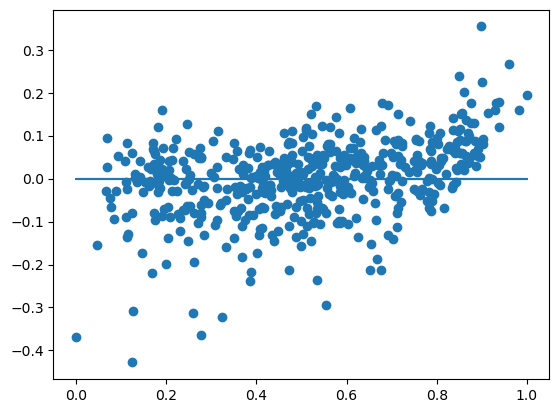

In [51]:
import statsmodels.api as sm
residuals = lm4.resid
plt.scatter(y_train, residuals)
plt.plot(y_train, [0]*len(y_train))
plt.show()

#### Homoscedasticity is present as there is constant deviation of the points from the zero-line

## Checking Residual autocorrelation

In [52]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(lm4.resid)

2.0046104287810436

#### The test statistic is 2.004. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_cnt = lm4.predict(X_train_lm)
res=(y_train - y_train_cnt)

Text(0.5, 0, 'Errors')

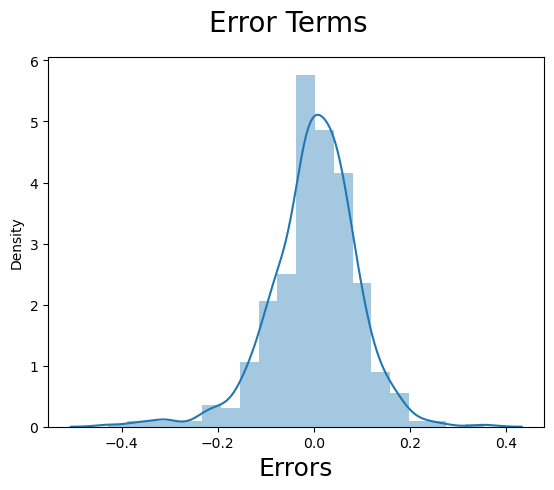

In [54]:
%matplotlib inline
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20) # residuals
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### The residuals are following the normally distributed with a mean 0. All good!

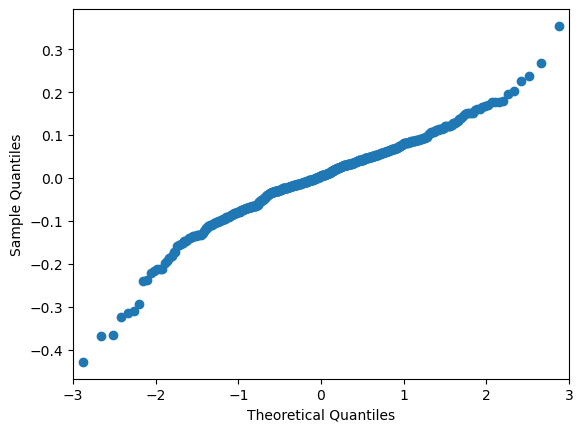

In [55]:
import statsmodels.api as sm
residuals = lm4.resid
sm.qqplot(residuals)
plt.show()

## Now above Model looks fine  :
- low p-value and low VIF  : lm4
- R-squared and Adj. R-squared very close indicating none of parameters in this model are redundant
- Our Linear Regression assumptions are also within accepted range

## Making Predictions

#### Applying the scaling on the test sets

In [56]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
# Making predictions
y_pred = lm4.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

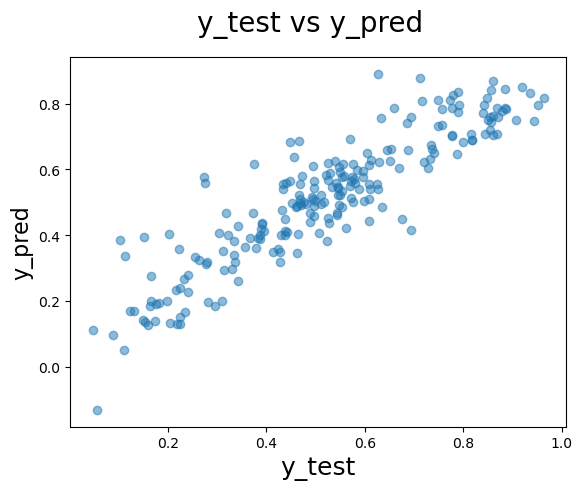

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) # Y-label

In [62]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)


0.8106576718642015


# Actual vs Predicted
#### Model evaluation (Plot Actual vs Predicted)

Text(0.5, 0.98, 'Actual and Predicted')

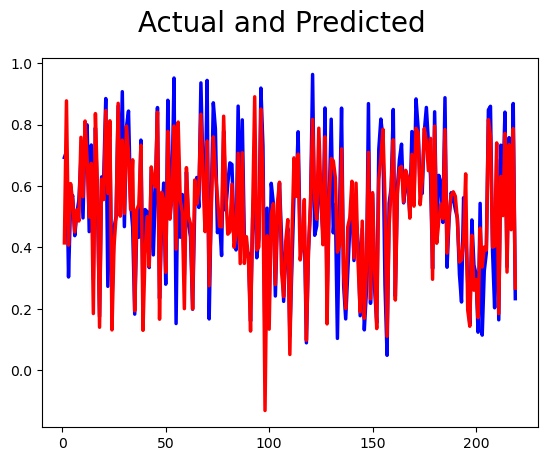

In [63]:
import matplotlib.pyplot as plt
c = [i for i in range(1,220,1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 

#### Model evaluation (Plot Error terms)

Text(0, 0.5, 'ytest-ypred')

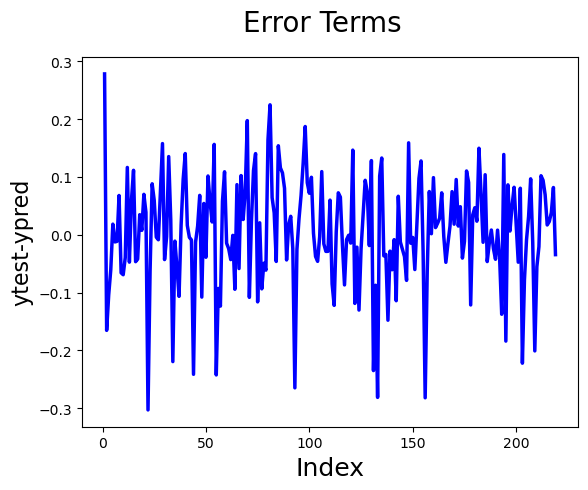

In [64]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16) 

#### Checking mean square error and R square

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008992966891865887
r_square_value : 0.8106576718642015


##  We can now check the mean square error and r square value of our model.
Our model is getting a mean square error of 0.8 which means the model is not able to match just 0.8% of the
values only, which is good.
The r square value is above 80% which means our model is able to explain 82% of the variance which is also
good.
Overall your model is very decent.

Overall we have a decent model!

# Regression Equation as per lm4

#### cnt = 0.2038 + (temp * 0.4510) + (workingday * 0.0543) − (windspeed * 0.1415) + (yr * 0.2344) - (season_spring * 0.1117) + (weekday_Sat * 0.0659) - (weathersit_Cloudy * 0.0825) + (season_winter × 0.0480)  - (mnth_Jul × 0.0699 ) + (mnth_Sep × 0.0542 ) - (weathersit_Rainy * 0.2904) 



# Recommendations:

- Demand for rental bikes will be increased every passing year
- There will be decrease in demand on Rainy and Cloudy weather and comparatively more demand on Clear weather
- Demand for rental bikes is in good relation of temperature which means when temeprature will increase it will result into more demand
- Windspeed slower will lead to more demand
- Seasons of Summer and Winter will have more demand for rental bikes
- Demand for rental bikes will be higher on weekends
   

# Thank You!

## Below given lines of code can be avoided for evaluation , its my implementation for cross-validation which i wanted to try
## Please feel free to skip this

## Cross validation in scikit-learn

In [ ]:
# using default cross_val_score uses a 5-fold strategy
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores  

In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores 

In [ ]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# k-fold cross-validation

lm = LinearRegression()
from sklearn.model_selection import cross_val_score
CV_MSE = np.mean(-cross_val_score(lm, X_train, y_train, cv = 12 ,scoring = "neg_mean_squared_error" ))
CV_RMSE = np.sqrt(CV_MSE)
print("Validated Mean Squared Error: ", CV_MSE)
print("Validated Root Mean Squared Error: ", CV_RMSE)

In [ ]:
lm = LinearRegression()
from sklearn.model_selection import cross_val_score
CV_MSE = np.mean(-cross_val_score(lm, X_train, y_train, cv = 10 ,scoring = "neg_mean_squared_error" ))
CV_RMSE = np.sqrt(CV_MSE)
print("Validated Mean Squared Error: ", CV_MSE)
print("Validated Root Mean Squared Error: ", CV_RMSE)

In [ ]:
len(X_train.columns)

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 31))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)        

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# final model
n_features_optimal = 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

#### 12 numbers which we took seems fine here

In [66]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.3.4
jupyter_core     : 4.11.1
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : 5.3.2
traitlets        : 5.1.1


In [71]:
#import python_version()
from platform import python_version

In [72]:
python_version()

'3.9.13'

In [73]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
            yield 
list(imports())

['builtins',
 'builtins',
 'warnings',
 'numpy',
 'pandas',
 'matplotlib.pyplot',
 'seaborn',
 'plotly.express',
 'statsmodels.api',
 'sklearn',
 'types']

In [74]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.21.5
pandas==1.4.4
seaborn==0.11.2
statsmodels.api==0.13.2
sklearn==1.0.2
